# YouTube trending videos

In [119]:
%matplotlib inline


import numpy as np
import pandas as pd
from numpy import nan

# import json
# import math
import os
from typing import List
# import re
# from IPython.display import Image

import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
import pandas as pd
# from tqdm.notebook import tqdm
from scipy import stats

from helpers.categories import get_categories_dict
from helpers.files import load_csv

## Etap 3 - Ocena ważności atrybutów


### Wczytanie danych zgrupowanych po id

TODO trending days

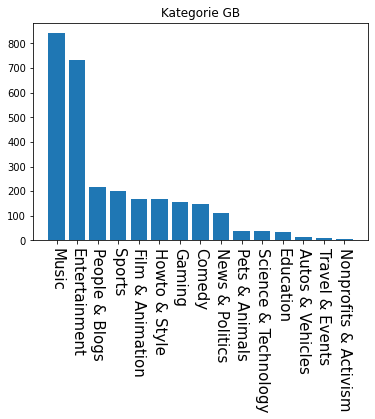

Kategorie GB Liczba wartości 'nan':394


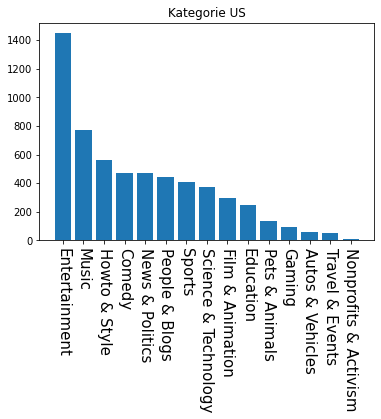

Kategorie US Liczba wartości 'nan':494


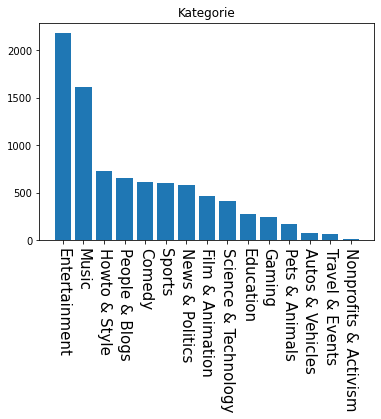

Kategorie Liczba wartości 'nan':888


In [120]:
numeric_attrs = [
    "views", "likes", "dislikes", "comment_count", "description_len", "title_len", "channel_title_len",
    "publish_time_day_of_week", "publish_time_hour_of_day"
]


def plot_categories(title: str, categories_dict: dict, data: pd.DataFrame) -> list:
    nan_count = data["new_category_id"].isna().sum()
    plt.title(title)
    attr_c = data["new_category_id"].value_counts()
    attr_c = attr_c.rename_axis("new_category_id").reset_index(name="count")
    labels = [categories_dict[i] for i in attr_c["new_category_id"]]
    plt.bar(labels, attr_c["count"])
    plt.xticks(rotation=270, fontsize=15)
    plt.show()

    print(f"{title} Liczba wartości 'nan':{nan_count}")
    return attr_c["new_category_id"].tolist()


data_dir = "ped3_data"
# data_path = os.path.join("..", "categories_data")
gb_videos, us_videos = load_csv(data_dir)
# gb_videos = pd.read_csv(os.path.join(data_path, "GB_videos_5p.csv"), sep=";", index_col=0)
# us_videos = pd.read_csv(os.path.join(data_path, "US_videos_5p.csv"), sep=";", index_col=0)
videos = pd.concat([gb_videos, us_videos])
for name in numeric_attrs:
    videos[name] = videos[name].apply(lambda x: eval(x))
videos.head(10)

categorical_attrs = ["video_id", "thumbnail_link", "comments_disabled", "ratings_disabled", "video_error_or_removed",
                     "trending_date"]

for name in categorical_attrs:
    videos[name] = videos[name].apply(lambda x: eval(x)[-1] if eval(x) else np.nan)

categories_dict = get_categories_dict()

d = [gb_videos, us_videos]
names = ["Kategorie GB", "Kategorie US"]
for df, name in zip(d, names):
    plot_categories(name, categories_dict, df)
categories = plot_categories("Kategorie", categories_dict, videos)


TODO komentarz nizbalansowane dane

In [121]:
for i in numeric_attrs:
    videos[i] = videos[i].apply(lambda x: x[-1])
videos["category_name"] = videos["new_category_id"].apply(lambda x: np.nan if np.isnan(x) else categories_dict[x])
grouped = videos.groupby("category_name")

grouped.agg([np.mean, np.std])
# videos.describe()

category_id                   views                \
                             mean       std          mean           std   
category_name                                                             
Autos & Vehicles         3.571429  5.879747  1.141300e+06  2.401132e+06   
Comedy                  23.000000  0.000000  1.528191e+06  1.946888e+06   
Education               26.975309  0.156150  6.373416e+05  9.994431e+05   
Entertainment           23.913738  2.152335  2.055705e+06  7.065023e+06   
Film & Animation         1.750000  3.955970  2.478536e+06  5.384405e+06   
Gaming                  20.066667  0.632456  1.234628e+06  1.995944e+06   
Howto & Style           25.971014  0.310231  8.221302e+05  2.359169e+06   
Music                   10.172897  1.547888  9.680061e+06  2.703447e+07   
News & Politics         25.000000  0.000000  5.241834e+05  1.188799e+06   
Nonprofits & Activism   29.000000  0.000000  3.416222e+06  8.171904e+06   
People & Blogs          22.046296  0.357882  1.392806e+06  3.906512e+06   
Pets & Animals          14.735849  1.923048  8.036315e+05  1.204420e+06   
Science & Technology    27.884615  0.672738  1.148030e+06  2.930253e+06   
Sports                  17.045198  0.601317  1.337699e+06  3.267596e+06   
Travel & Events         19.000000  0.000000  1.019269e+06  3.051579e+06   

                               likes                     dislikes  \
                                mean            std          mean   
category_name                                                       
Autos & Vehicles        14996.890411   21548.247860    601.178082   
Comedy                  57165.259677   87954.417948   2075.358065   
Education               22717.864286   41030.451375    788.003571   
Entertainment           53639.029817  178491.389830   5850.412385   
Film & Animation        46144.854701   90413.360281   2098.918803   
Gaming                  37404.959350   60224.903519   2160.252033   
Howto & Style           31379.553425   53324.737701   1043.005479   
Music                  229322.544610  490080.850637   8857.712515   
News & Politics          7952.808950   31179.470663   1686.547332   
Nonprofits & Activism  251556.111111  650955.912384  61707.666667   
People & Blogs          42707.675758   81371.195963   3017.109091   
Pets & Animals          20266.835227   28630.179673    523.715909   
Science & Technology    27750.821687   52621.666488   1322.838554   
Sports                  26167.779967  106508.250673   1885.060755   
Travel & Events          9727.553846   10243.780255    641.292308   

                                     comment_count                 ...  \
                                 std          mean            std  ...   
category_name                                                      ...   
Autos & Vehicles          898.610831   2218.794521    2926.711043  ...   
Comedy                   3572.794663   6141.419355   13491.649815  ...   
Education                1446.116588   2540.214286    3986.719002  ...   
Entertainment           76044.106529   8189.290826   56376.349043  ...   
Film & Animation         4086.382387   5522.435897   10537.877198  ...   
Gaming                   5408.373975   6805.203252   12383.775557  ...   
Howto & Style            3167.510075   4386.321918   14498.445658  ...   
Music                   26697.570019  18199.416357   60989.227930  ...   
News & Politics          6658.686309   2859.013769    7775.702027  ...   
Nonprofits & Activism  168213.768881  80752.833333  219435.731349  ...   
People & Blogs          15440.568927   5675.654545   21235.128074  ...   
Pets & Animals            806.903116   2495.409091    4558.738105  ...   
Science & Technology     3541.677086   4007.696386   11231.619775  ...   
Sports                  11533.492319   3216.254516    9289.058209  ...   
Travel & Events          1326.847953   1690.046154    2422.531910  ...   

                      freq_tags_Science & Technology            \
                             

# Atrybuty numeryczne

Korelacja atrybutów liczbowych z kategorią

Korelacja ETA i ANOVA (Analysis of Variance) i F test z p

views: f_score = 42.52843019359817 p_value = 5.725638831421379e-114


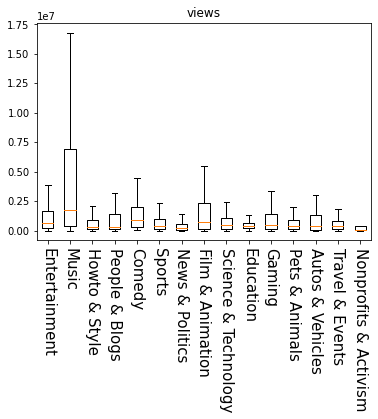

likes: f_score = 63.4383395367562 p_value = 1.3417823975562106e-171


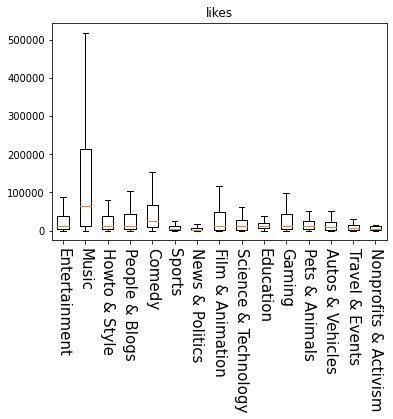

dislikes: f_score = 5.6727080936775875 p_value = 4.131639242032016e-11


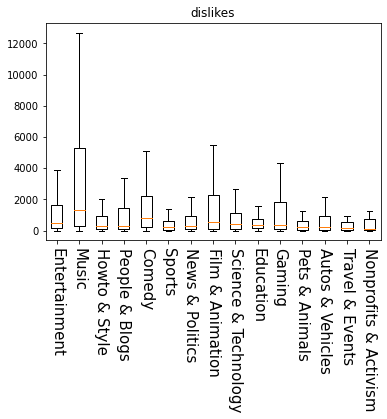

comment_count: f_score = 14.40104240851909 p_value = 7.094228782184063e-35


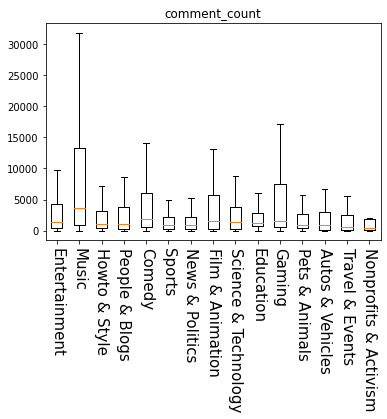

description_len: f_score = 35.28077776411028 p_value = 1.1965109301151156e-93


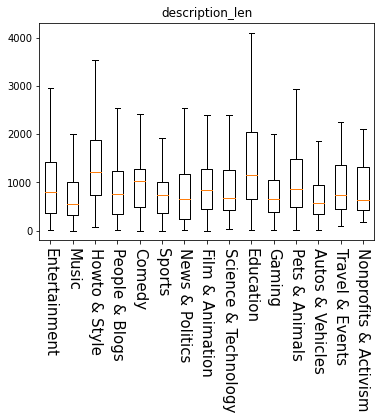

title_len: f_score = 69.97833842678143 p_value = 2.508022805516716e-189


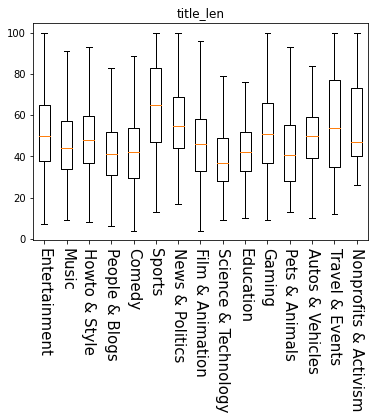

channel_title_len: f_score = 54.26644533116559 p_value = 1.7106414156763909e-146


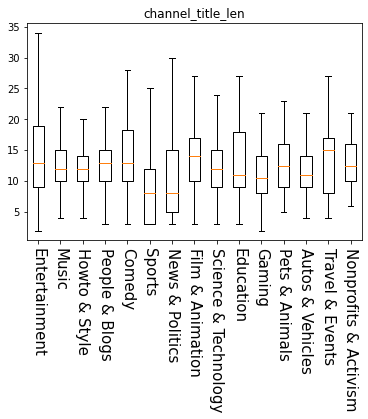

publish_time_day_of_week: f_score = 4.4781752308734175 p_value = 4.232630869892645e-08


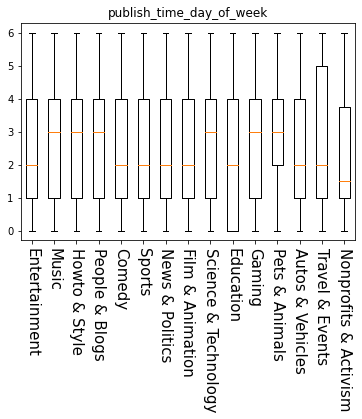

publish_time_hour_of_day: f_score = 19.390014949374397 p_value = 6.799815815987679e-49


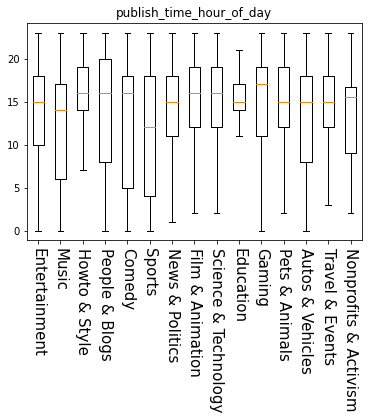

0.46918479532312785


,attr,f score,p value,leq alpha
0,views,42.528430,5.725639e-114,True
1,likes,63.438340,1.341782e-171,True
2,dislikes,5.672708,4.131639e-11,True
3,comment_count,14.401042,7.094229e-35,True
4,description_len,35.280778,1.196511e-93,True
5,title_len,69.978338,2.508023e-189,True
6,channel_title_len,54.266445,1.710641e-146,True
7,publish_time_day_of_week,4.478175,4.232631e-08,True
8,publish_time_hour_of_day,19.390015,6.799816e-49,True


In [122]:
# stats.chi2.pdf()
categories_data = []
N = 0
a = len(categories)
for category_id in categories:
    c_data = videos[videos["new_category_id"] == category_id]
    N += len(c_data)
    categories_data.append(c_data)

dfn = a - 1
dfd = N - a


def anova(data: List[pd.DataFrame], attr: str):
    data_set = list(map(lambda x: x[attr].dropna(), data))
    f_score, p_value = stats.f_oneway(
        *data_set
    )
    print(f"{attr}: f_score = {f_score} p_value = {p_value}")
    plt.title(attr)
    plt.boxplot(data_set, showfliers=False)
    labels = [categories_dict[i] for i in categories]
    plt.xticks(np.arange(1, len(labels) + 1), labels, rotation=270, fontsize=15)
    plt.show()
    return f_score, p_value


f_scores = pd.DataFrame()
alpha = 0.05
for i in numeric_attrs:
    f, p = anova(categories_data, i)
    f_scores = f_scores.append(pd.DataFrame(
        data={"attr": [i], "f score": [f], "p value": [p], "leq alpha": [p <= alpha]}
    ), ignore_index=True)
print(stats.f.ppf(0.05, dfn, dfd))
f_scores

Poszczególne kategorie mają różne średnie wartości na wszystkich atrybutach ( $$ \alpha = 0.05 $$ )

## Ocena atrybutów tekstowych

Po podaniu tekstów procesowi tokenizacji zostały wygenerowane dla nich cechy
numeryczne, które wyrażają liczbę występujących częstych tokenów przez liczbę wszyskich
często występujących tokenów dla każdej kategorii na każdym atrybucie.

In [123]:
tokenized_attrs = ["channel_titles", "descriptions", "ocr_text", "titles", "domains", "filtered_ocr_text"]
frequent_attrs = list(filter(lambda x: x.startswith("freq_"), videos.columns.tolist()))
print(frequent_attrs)

## Przygotowanie danych o kategoriach

['freq_channel_titles_Entertainment', 'freq_channel_titles_Music', 'freq_channel_titles_People & Blogs', 'freq_channel_titles_Howto & Style', 'freq_channel_titles_News & Politics', 'freq_channel_titles_Comedy', 'freq_channel_titles_Sports', 'freq_channel_titles_Travel & Events', 'freq_channel_titles_Gaming', 'freq_channel_titles_Education', 'freq_channel_titles_Pets & Animals', 'freq_channel_titles_Science & Technology', 'freq_channel_titles_Film & Animation', 'freq_channel_titles_Autos & Vehicles', 'freq_channel_titles_Nonprofits & Activism', 'freq_channel_titles_Shows', 'freq_descriptions_Entertainment', 'freq_descriptions_Music', 'freq_descriptions_People & Blogs', 'freq_descriptions_Howto & Style', 'freq_descriptions_News & Politics', 'freq_descriptions_Comedy', 'freq_descriptions_Sports', 'freq_descriptions_Travel & Events', 'freq_descriptions_Gaming', 'freq_descriptions_Education', 'freq_descriptions_Pets & Animals', 'freq_descriptions_Science & Technology', 'freq_descriptions_Fi

In [124]:
# categories_ids = pd.unique(videos["category_id"])
#
# categories_dict = get_categories_dict()
# categories = [categories_dict[x] for x in categories_ids if not np.isnan(x)]
# videos["category_name"] = videos["category_id"].apply(lambda x: np.nan if np.isnan(x) else categories_dict[x])
# print(categories_ids)
# print(categories)

## Tytuł kanału

freq_channel_titles_Entertainment: f_score = 136.17034719664153 p_value = 0.0


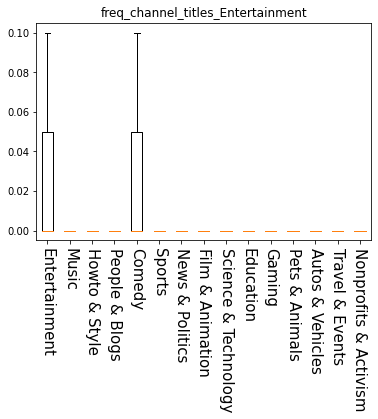

freq_channel_titles_Music: f_score = 43.991996381100904 p_value = 4.781822715237908e-118


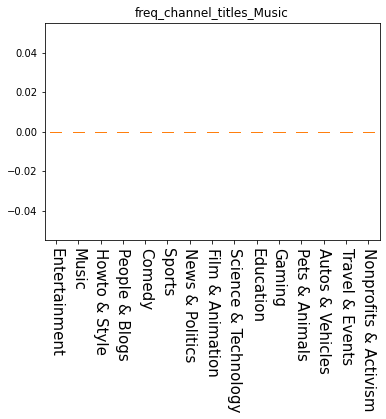

freq_channel_titles_Howto & Style: f_score = 159.18303219231746 p_value = 0.0


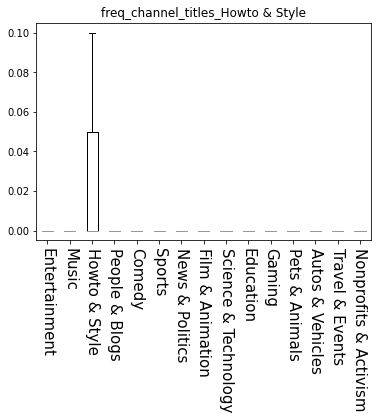

freq_channel_titles_People & Blogs: f_score = 113.99998021173933 p_value = 7.321333317393461e-305


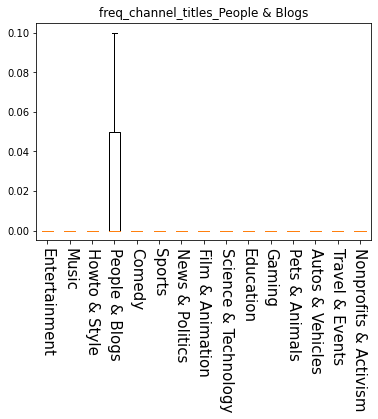

freq_channel_titles_Comedy: f_score = 194.32239420924927 p_value = 0.0


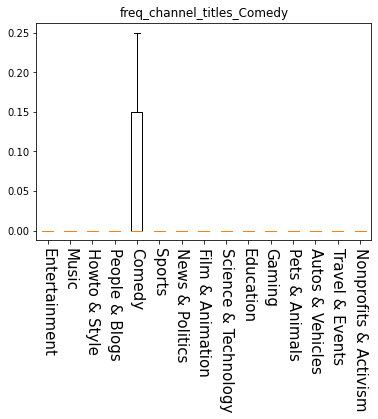

freq_channel_titles_Sports: f_score = 529.205853451932 p_value = 0.0


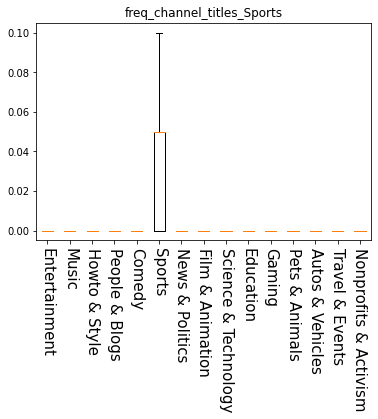

freq_channel_titles_News & Politics: f_score = 639.5615742269913 p_value = 0.0


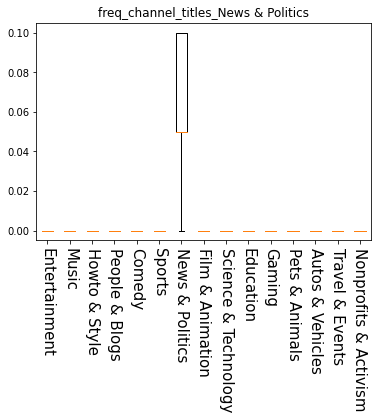

freq_channel_titles_Film & Animation: f_score = 357.7477768567478 p_value = 0.0


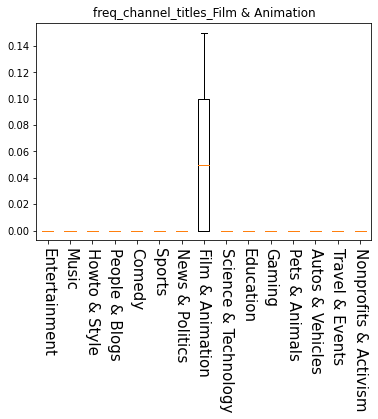

freq_channel_titles_Science & Technology: f_score = 221.36654156492955 p_value = 0.0


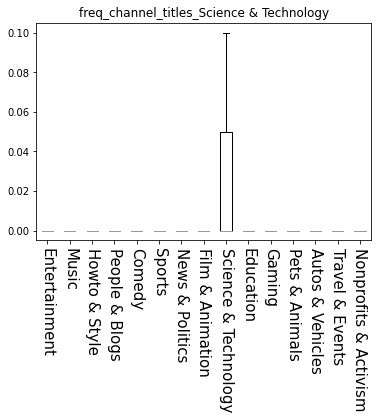

freq_channel_titles_Education: f_score = 367.67549264128223 p_value = 0.0


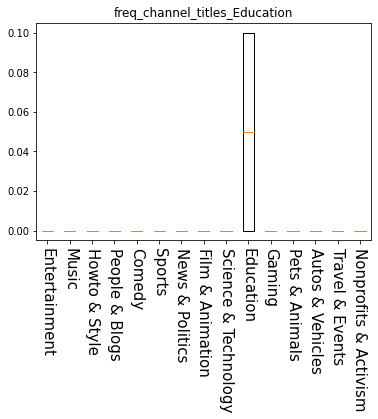

freq_channel_titles_Gaming: f_score = 100.84586412612968 p_value = 5.01601570573494e-271


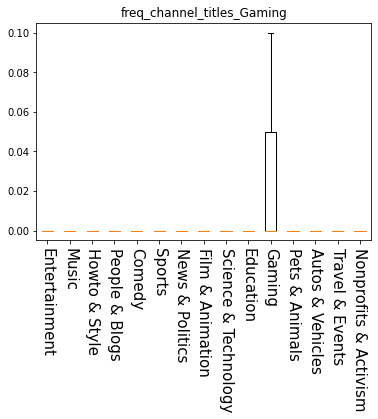

freq_channel_titles_Pets & Animals: f_score = 150.0806084872404 p_value = 0.0


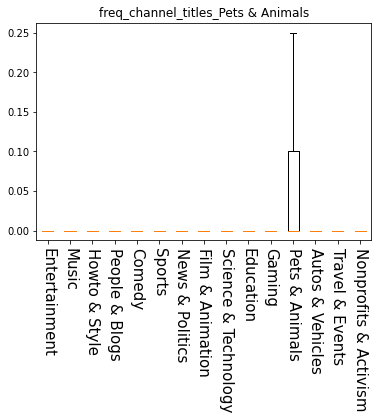

freq_channel_titles_Autos & Vehicles: f_score = 41.47159203418252 p_value = 5.087600656399457e-111


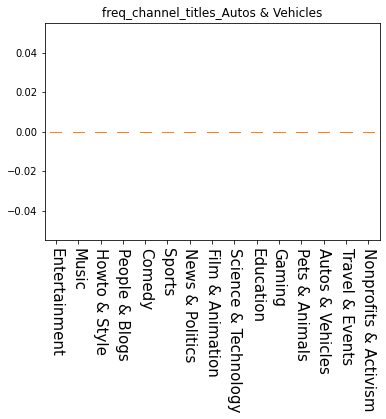

freq_channel_titles_Travel & Events: f_score = 206.3494150225766 p_value = 0.0


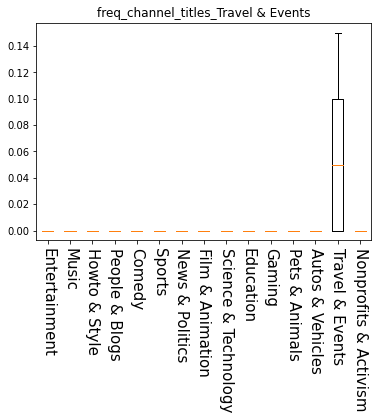

freq_channel_titles_Nonprofits & Activism: f_score = 30.06113656977793 p_value = 5.274798880238771e-79


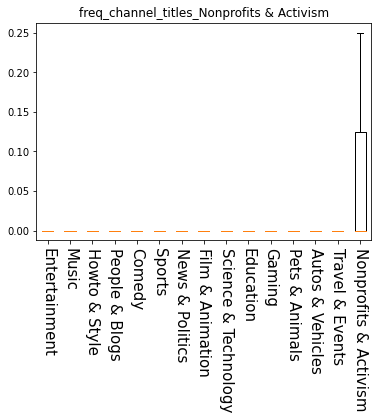

In [125]:
attr = "channel_titles"
for cat in categories:
    attr_name = f"freq_{attr}_{categories_dict[cat]}"
    anova(categories_data, attr_name)

## Tytuł filmu

freq_titles_Entertainment: f_score = 89.12749829303566 p_value = 2.151918059892368e-240


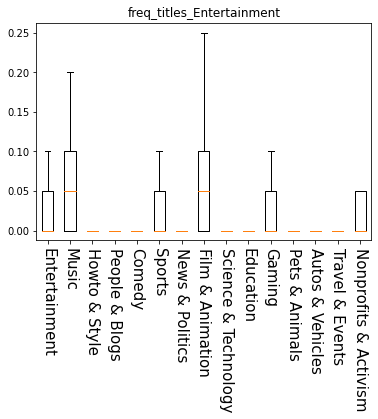

freq_titles_Music: f_score = 258.9600240797056 p_value = 0.0


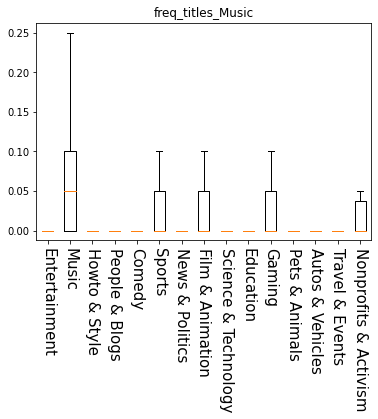

freq_titles_Howto & Style: f_score = 95.92502730148637 p_value = 3.213706135268283e-258


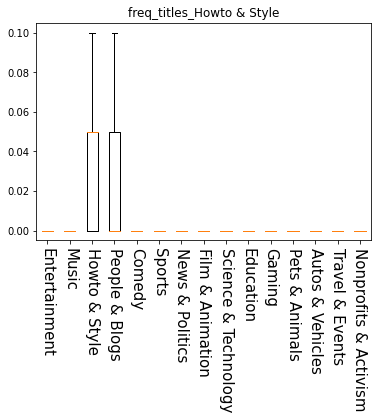

freq_titles_People & Blogs: f_score = 46.542892694491485 p_value = 3.8599319733188723e-125


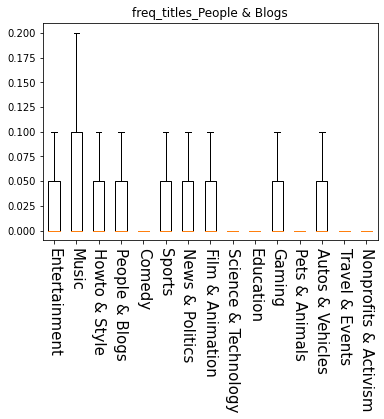

freq_titles_Comedy: f_score = 62.37461445925755 p_value = 1.0590329856886788e-168


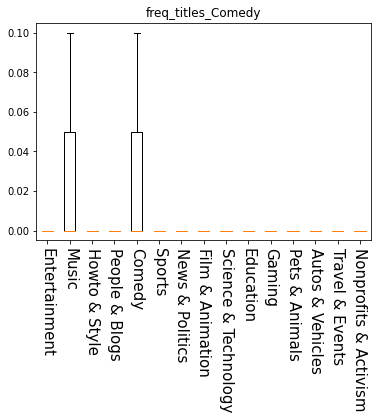

freq_titles_Sports: f_score = 237.2557205636025 p_value = 0.0


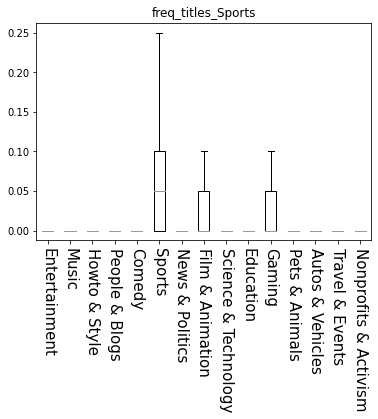

freq_titles_News & Politics: f_score = 62.909502809466524 p_value = 3.694680985623172e-170


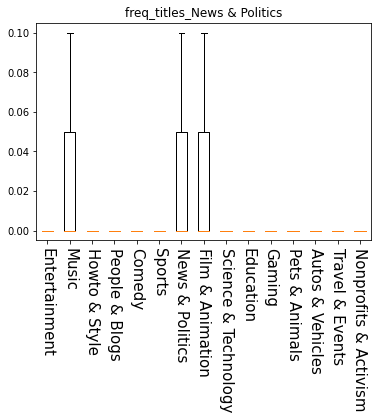

freq_titles_Film & Animation: f_score = 158.5359283056635 p_value = 0.0


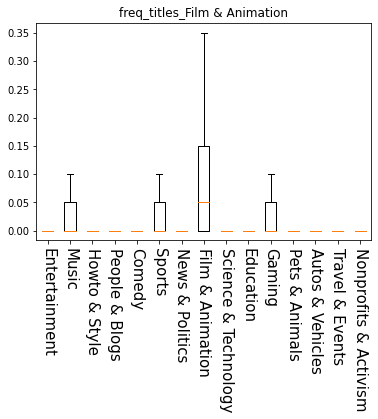

freq_titles_Science & Technology: f_score = 44.097666831083544 p_value = 2.4287527468169797e-118


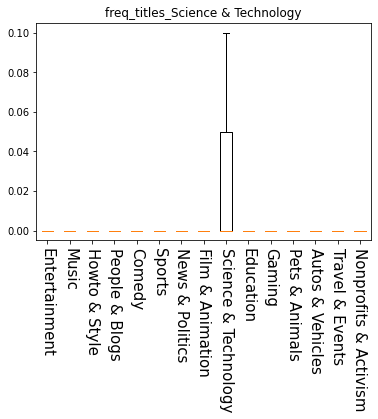

freq_titles_Education: f_score = 14.309942491824096 p_value = 1.2753303732188011e-34


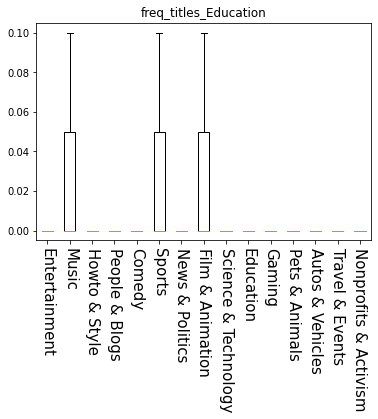

freq_titles_Gaming: f_score = 98.9346459994805 p_value = 4.6202044022472217e-266


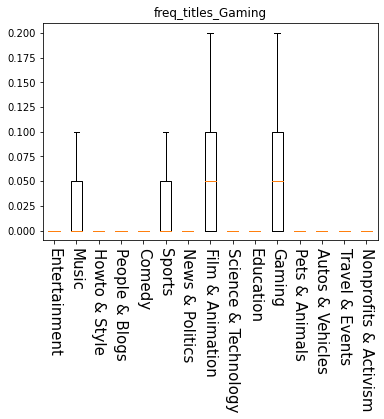

freq_titles_Pets & Animals: f_score = 127.69920837558357 p_value = 0.0


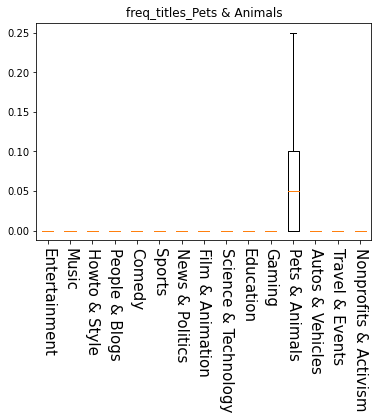

freq_titles_Autos & Vehicles: f_score = 34.34510380568365 p_value = 4.649705009197267e-91


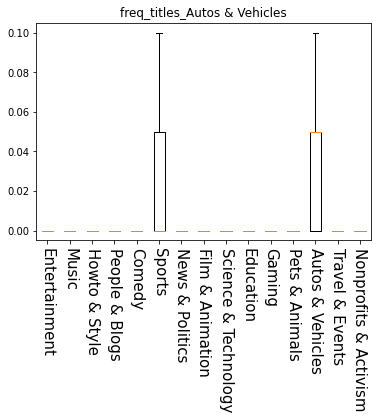

freq_titles_Travel & Events: f_score = 89.94688614104493 p_value = 1.4987421438176367e-242


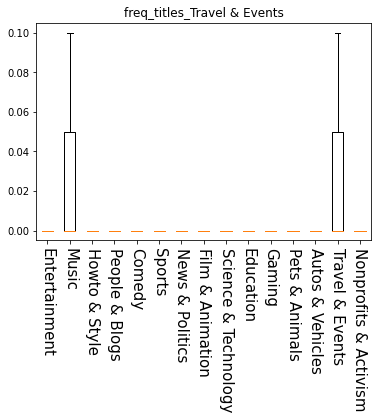

freq_titles_Nonprofits & Activism: f_score = 41.93890289516582 p_value = 2.5250976566770693e-112


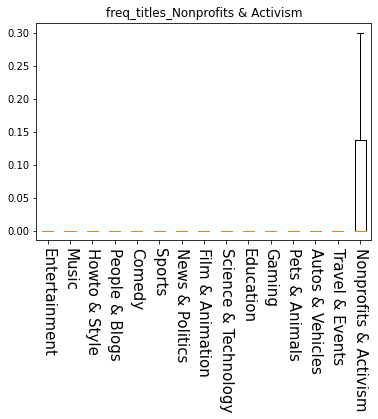

In [126]:
attr = "titles"
for cat in categories:
    attr_name = f"freq_{attr}_{categories_dict[cat]}"
    anova(categories_data, attr_name)


## Opisy filmów

freq_descriptions_Entertainment: f_score = 44.29556836218799 p_value = 6.830764018368688e-119


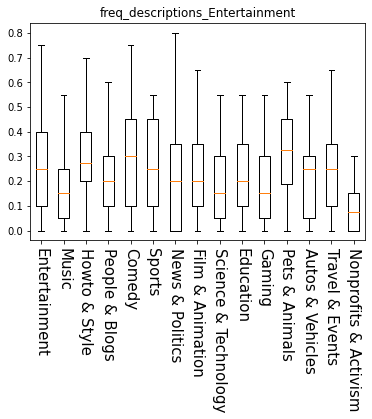

freq_descriptions_Music: f_score = 40.727335306235915 p_value = 6.094559757786883e-109


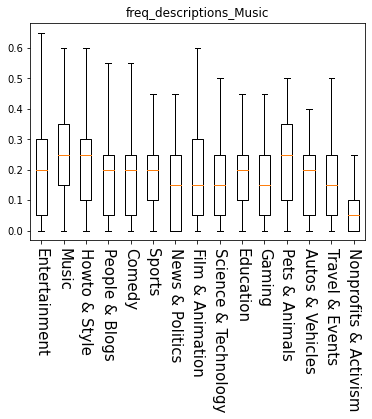

freq_descriptions_Howto & Style: f_score = 68.93129441907558 p_value = 1.6897145383121154e-186


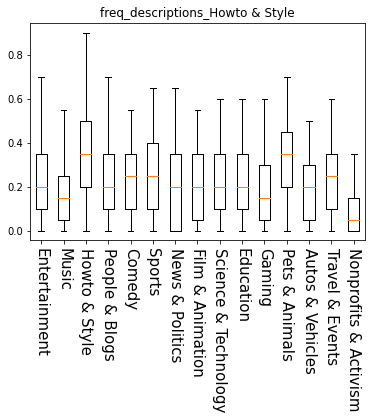

freq_descriptions_People & Blogs: f_score = 39.56658360108933 p_value = 1.0703152792388097e-105


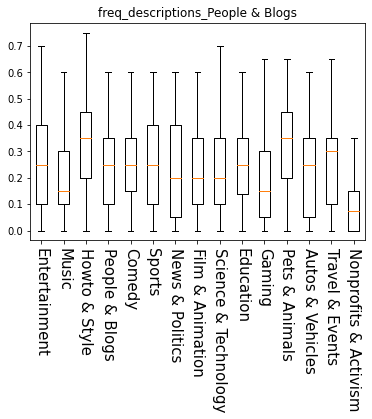

freq_descriptions_Comedy: f_score = 60.35614282884497 p_value = 3.412096513199143e-163


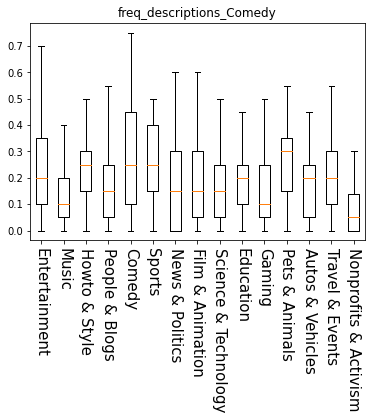

freq_descriptions_Sports: f_score = 85.78979659837641 p_value = 1.3908168043054386e-231


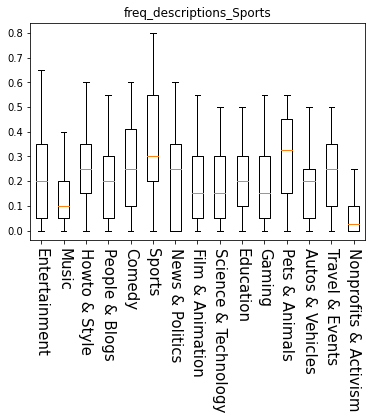

freq_descriptions_News & Politics: f_score = 48.212358089186665 p_value = 9.018220113011574e-130


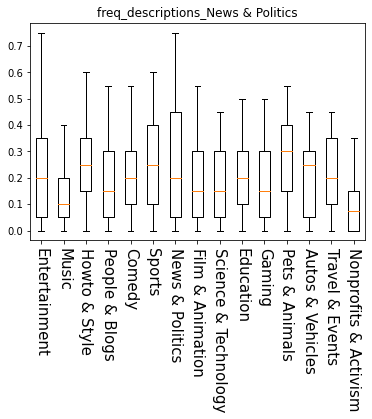

freq_descriptions_Film & Animation: f_score = 38.36161107501394 p_value = 2.5205195519433754e-102


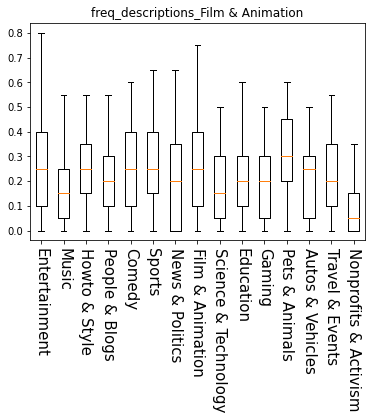

freq_descriptions_Science & Technology: f_score = 60.61823043446696 p_value = 6.562204796584857e-164


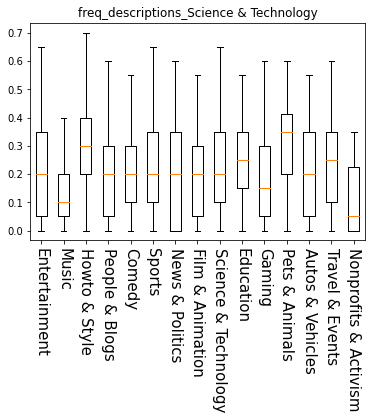

freq_descriptions_Education: f_score = 88.08498525846132 p_value = 1.204012885525447e-237


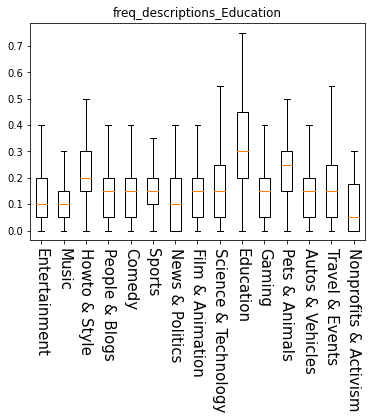

freq_descriptions_Gaming: f_score = 41.93073330520261 p_value = 2.6611767086170513e-112


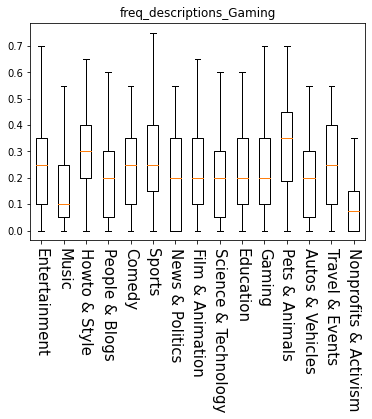

freq_descriptions_Pets & Animals: f_score = 52.3301413912904 p_value = 3.704096998326927e-141


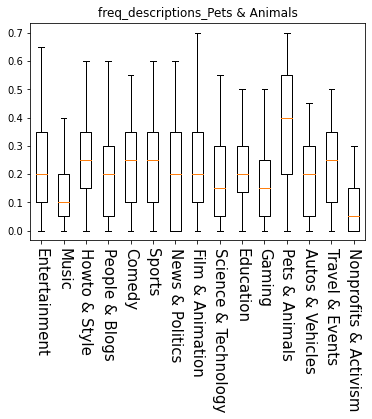

freq_descriptions_Autos & Vehicles: f_score = 41.47740955904986 p_value = 4.900866959659121e-111


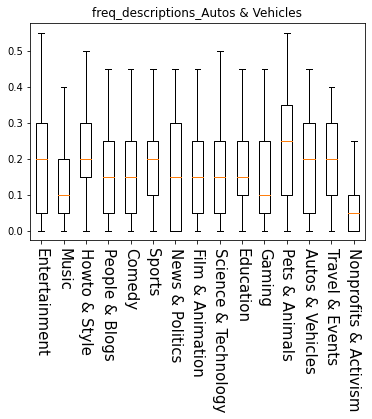

freq_descriptions_Travel & Events: f_score = 71.38331878760765 p_value = 4.072051706206841e-193


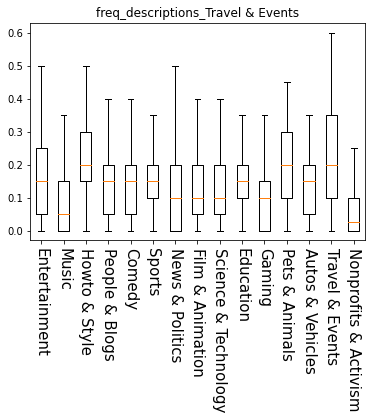

freq_descriptions_Nonprofits & Activism: f_score = 28.27141180984276 p_value = 5.857412070027682e-74


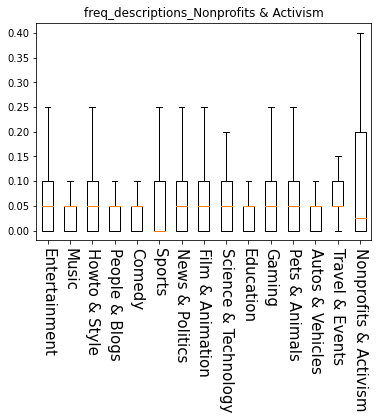

In [127]:
attr = "descriptions"
for cat in categories:
    attr_name = f"freq_{attr}_{categories_dict[cat]}"
    anova(categories_data, attr_name)

## OCR

freq_ocr_text_Entertainment: f_score = 7.80824738073183 p_value = 9.945930326020998e-17


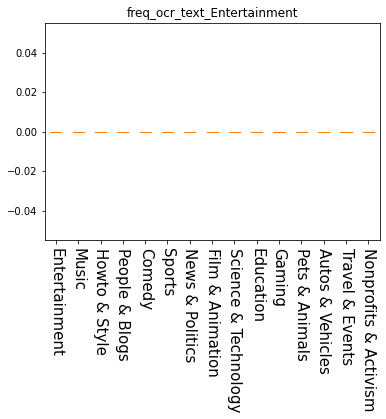

freq_ocr_text_Music: f_score = 12.55878421295854 p_value = 9.720020864893822e-30


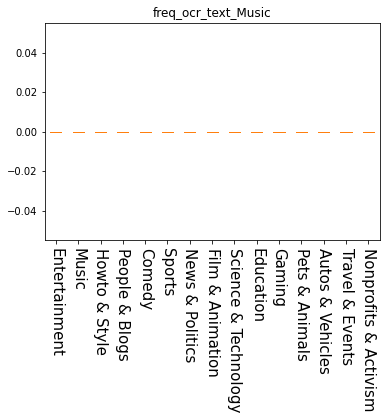

freq_ocr_text_Howto & Style: f_score = 5.144934369441844 p_value = 9.161456903982325e-10


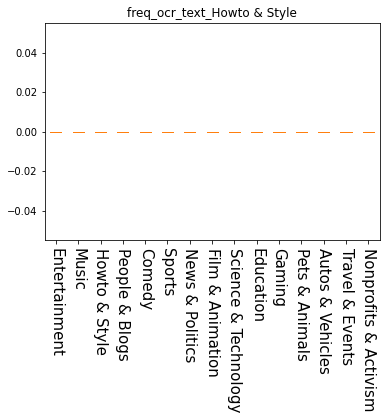

freq_ocr_text_People & Blogs: f_score = 2.4912600343014653 p_value = 0.0015565196183136018


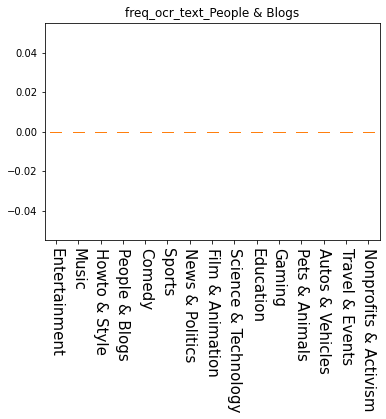

freq_ocr_text_Comedy: f_score = 8.57241210378624 p_value = 8.715209774762918e-19


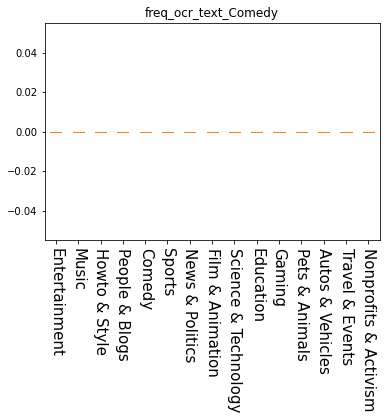

freq_ocr_text_Sports: f_score = 5.148432772854815 p_value = 8.976732409356479e-10


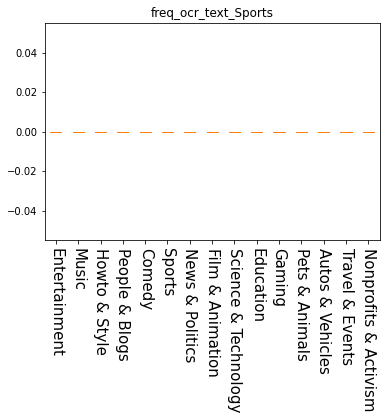

freq_ocr_text_News & Politics: f_score = 3.320476356924142 p_value = 2.415968144771996e-05


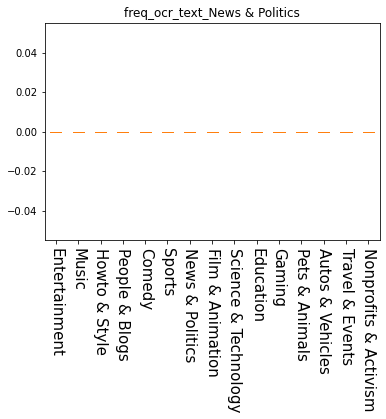

freq_ocr_text_Film & Animation: f_score = 13.887621690435287 p_value = 1.9300861170333717e-33


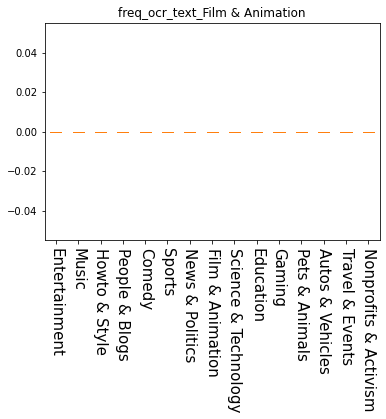

freq_ocr_text_Science & Technology: f_score = 4.086904884487797 p_value = 3.8055730346921176e-07


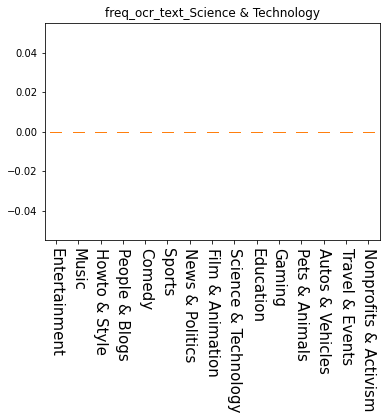

freq_ocr_text_Education: f_score = 10.933030422015662 p_value = 3.0806397825475885e-25


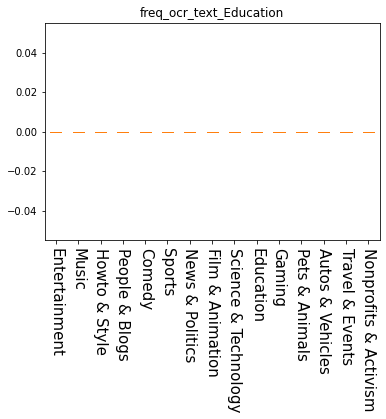

freq_ocr_text_Gaming: f_score = 13.584703153069732 p_value = 1.3520519519867866e-32


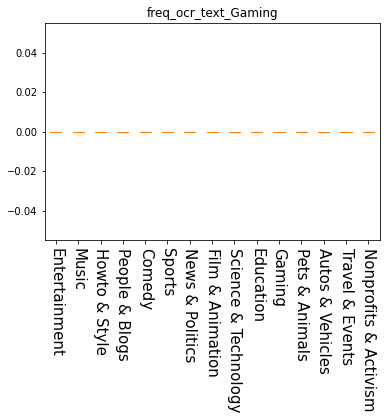

freq_ocr_text_Pets & Animals: f_score = 2.6867212537852874 p_value = 0.0006067713271020948


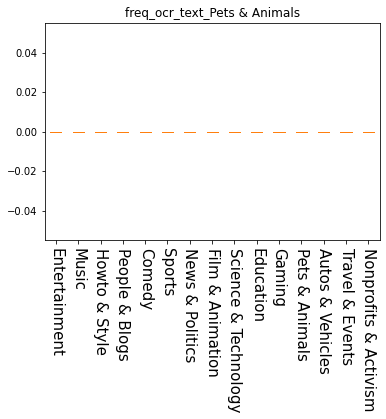

freq_ocr_text_Autos & Vehicles: f_score = 17.398642570937927 p_value = 2.7588067067829346e-43


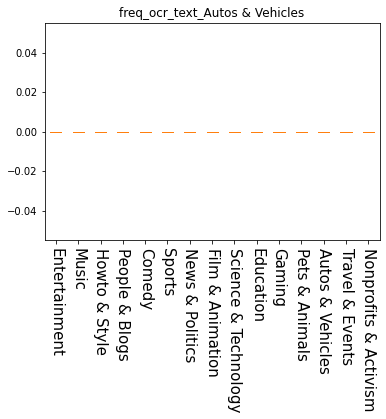

freq_ocr_text_Travel & Events: f_score = 2.090313152748687 p_value = 0.009709724817793426


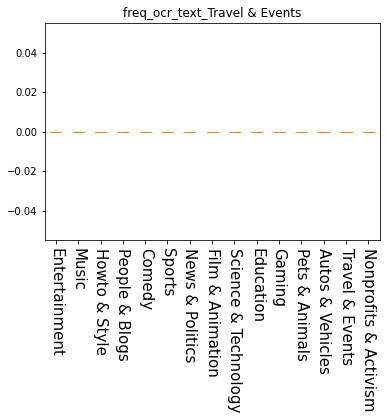

freq_ocr_text_Nonprofits & Activism: f_score = 36.7172472683994 p_value = 1.0211001540105284e-97


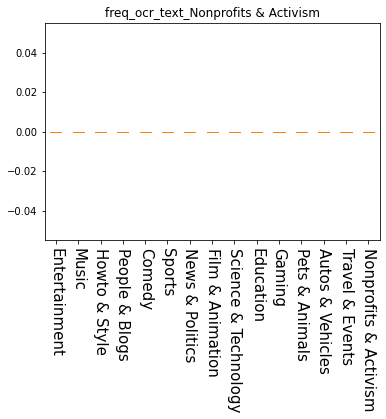

In [128]:
attr = "ocr_text"
for cat in categories:
    attr_name = f"freq_{attr}_{categories_dict[cat]}"
    anova(categories_data, attr_name)

## Filtered OCR

freq_filtered_ocr_text_Entertainment: f_score = 16.31125139332818 p_value = 3.14119685021106e-40


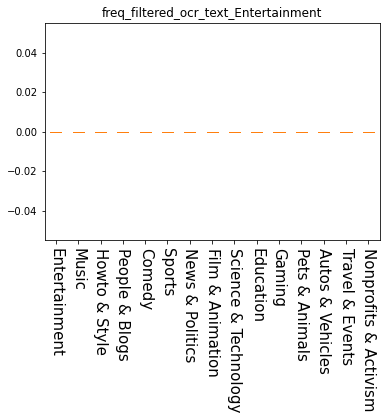

freq_filtered_ocr_text_Music: f_score = 27.527668354163865 p_value = 7.339537930665586e-72


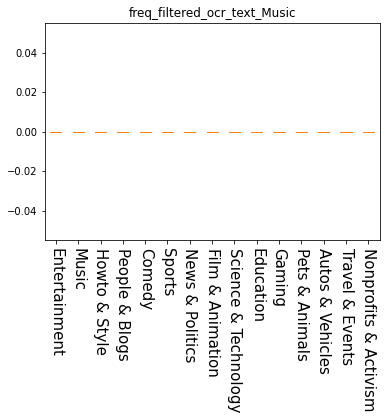

freq_filtered_ocr_text_Howto & Style: f_score = 0.912278499852174 p_value = 0.5446028745139326


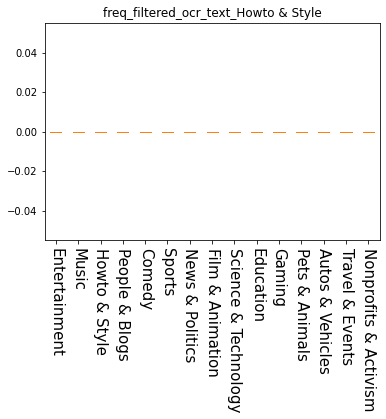

freq_filtered_ocr_text_People & Blogs: f_score = 1.7501375100942225 p_value = 0.04001211977237723


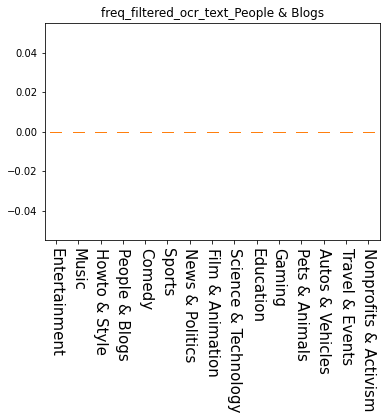

freq_filtered_ocr_text_Comedy: f_score = 1.872645557631191 p_value = 0.02444258279999706


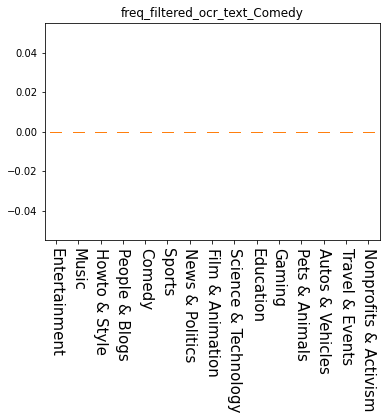

freq_filtered_ocr_text_Sports: f_score = 2.8684744670394737 p_value = 0.00024665098331190874


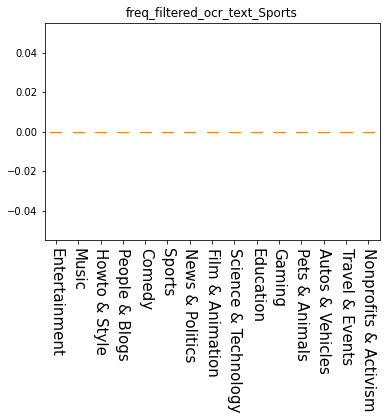

freq_filtered_ocr_text_News & Politics: f_score = 2.0083882828424913 p_value = 0.013835204642201913


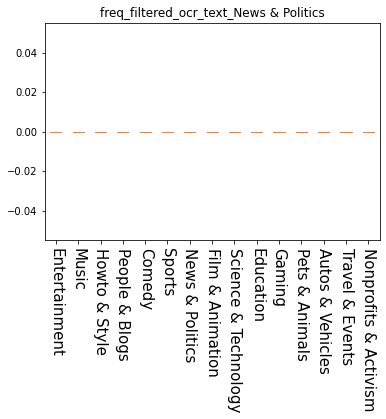

freq_filtered_ocr_text_Film & Animation: f_score = 16.31125139332818 p_value = 3.14119685021106e-40


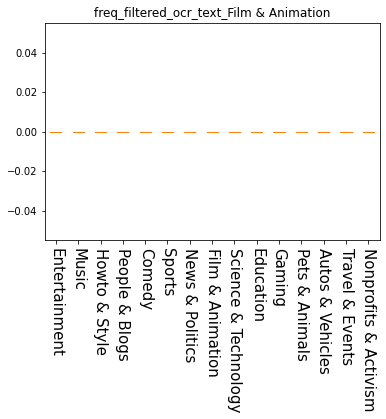

freq_filtered_ocr_text_Science & Technology: f_score = 1.433007703633123 p_value = 0.12848401893703779


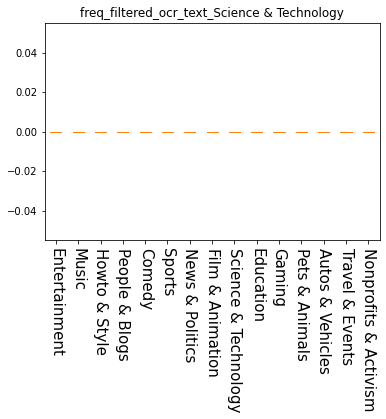

freq_filtered_ocr_text_Education: f_score = 4.337348830560215 p_value = 9.377963988201613e-08


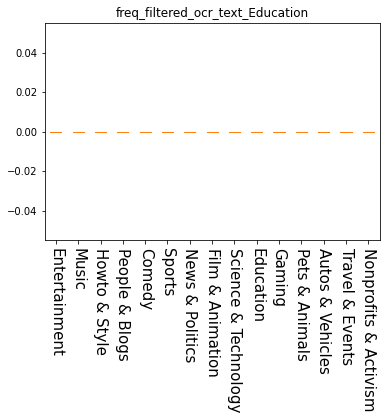

freq_filtered_ocr_text_Gaming: f_score = 3.6852227238415365 p_value = 3.447620421891039e-06


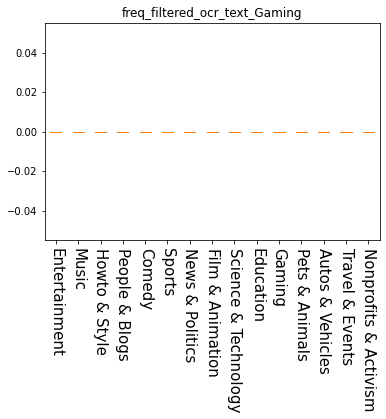

freq_filtered_ocr_text_Pets & Animals: f_score = 3.4874702989381188 p_value = 9.977870810448598e-06


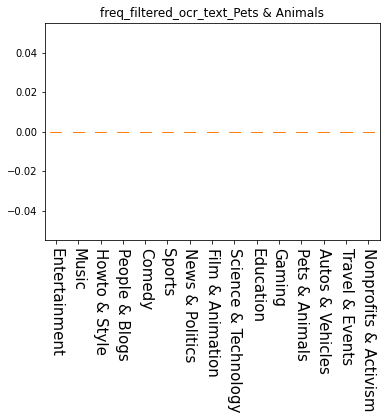

freq_filtered_ocr_text_Autos & Vehicles: f_score = 8.57849737872634 p_value = 8.391132239233339e-19


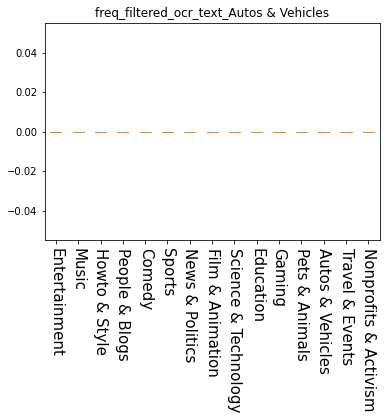

freq_filtered_ocr_text_Travel & Events: f_score = 5.1590849830846075 p_value = 8.436764581863699e-10


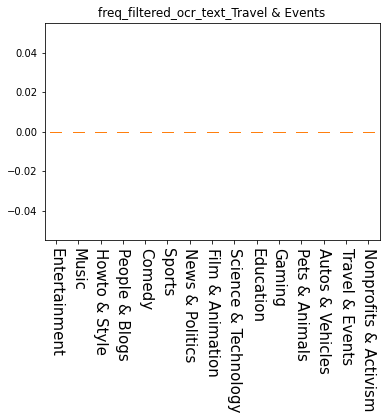

freq_filtered_ocr_text_Nonprofits & Activism: f_score = 36.7172472683994 p_value = 1.0211001540105284e-97


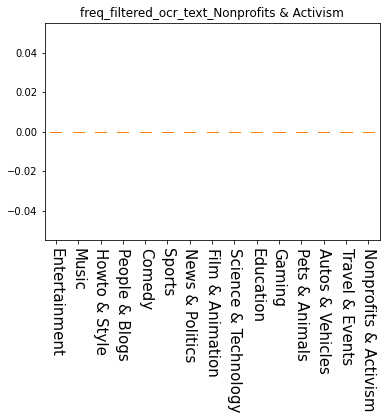

In [129]:
attr = "filtered_ocr_text"
for cat in categories:
    attr_name = f"freq_{attr}_{categories_dict[cat]}"
    anova(categories_data, attr_name)

## Domeny

freq_domains_Entertainment: f_score = 30.555629800176135 p_value = 2.1330956045804274e-80


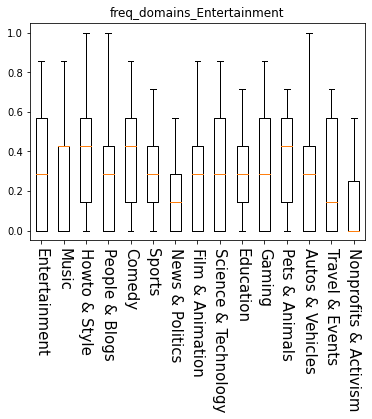

freq_domains_Music: f_score = 33.37703247117806 p_value = 2.4453238318165303e-88


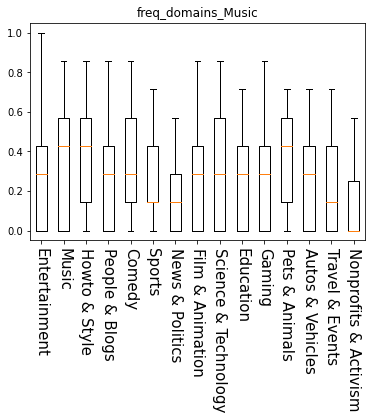

freq_domains_Howto & Style: f_score = 32.81356095239088 p_value = 9.396470436558483e-87


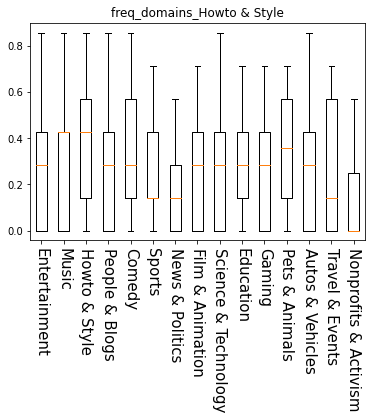

freq_domains_People & Blogs: f_score = 30.555629800176135 p_value = 2.1330956045804274e-80


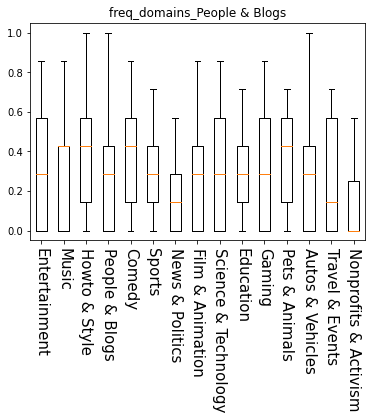

freq_domains_Comedy: f_score = 31.694639005587025 p_value = 1.3229212229895077e-83


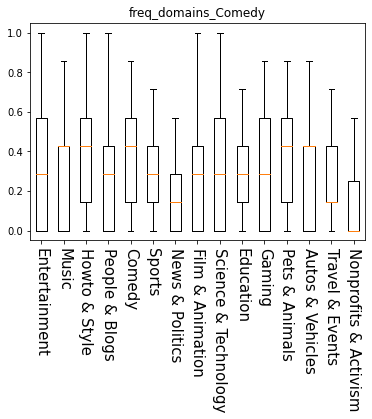

freq_domains_Sports: f_score = 28.084885179288378 p_value = 1.9669880085348205e-73


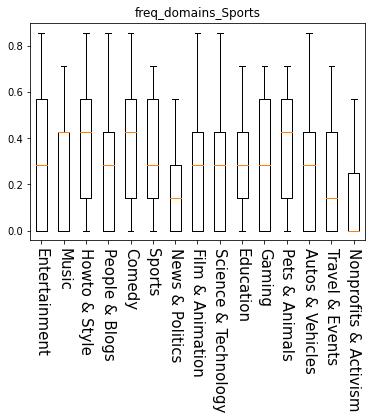

freq_domains_News & Politics: f_score = 27.291804967433098 p_value = 3.397230777050626e-71


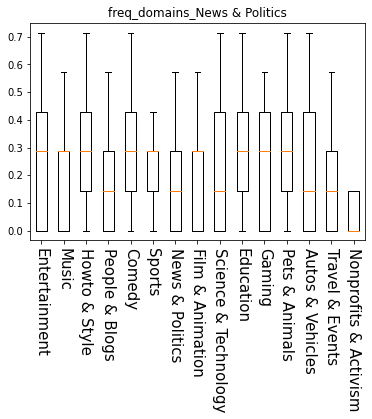

freq_domains_Film & Animation: f_score = 28.593008913842695 p_value = 7.256846162404958e-75


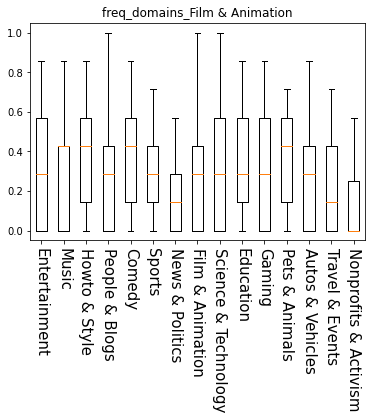

freq_domains_Science & Technology: f_score = 31.694639005587025 p_value = 1.3229212229895077e-83


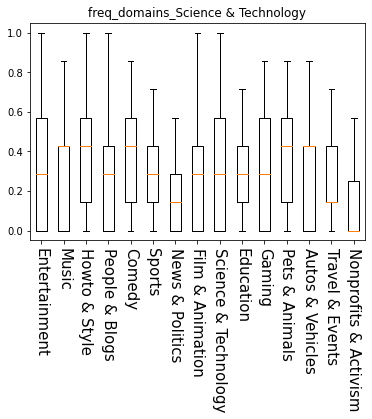

freq_domains_Education: f_score = 32.676140390639034 p_value = 2.288362811911564e-86


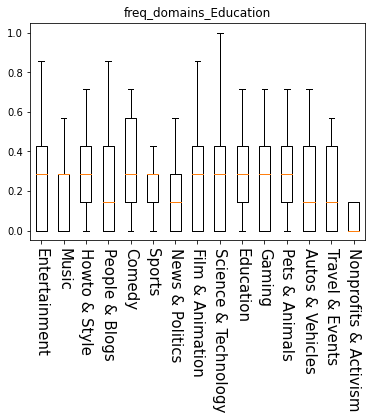

freq_domains_Gaming: f_score = 27.81025393845218 p_value = 1.1707697821824525e-72


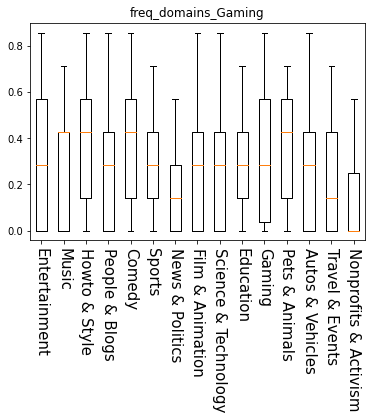

freq_domains_Pets & Animals: f_score = 28.032808194152487 p_value = 2.7586190044277767e-73


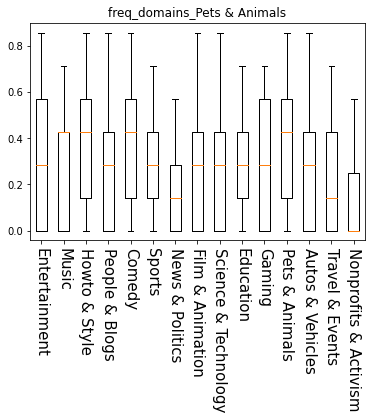

freq_domains_Autos & Vehicles: f_score = 31.246644652711247 p_value = 2.414469605469053e-82


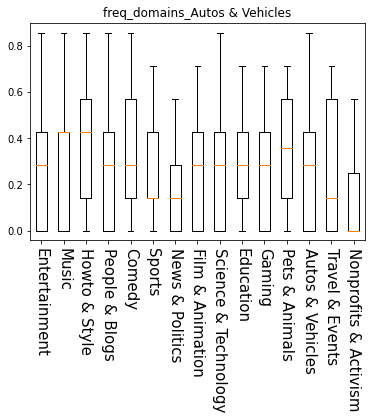

freq_domains_Travel & Events: f_score = 31.186559421703457 p_value = 3.564625365343227e-82


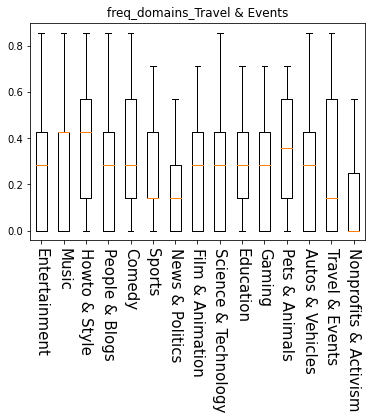

freq_domains_Nonprofits & Activism: f_score = 51.802780534825544 p_value = 1.0566463898003763e-139


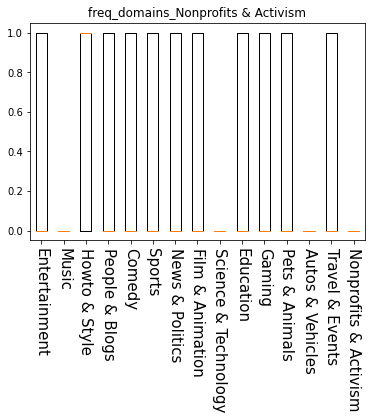

In [130]:
attr = "domains"
for cat in categories:
    attr_name = f"freq_{attr}_{categories_dict[cat]}"
    anova(categories_data, attr_name)

## TAGI

freq_tags_Entertainment: f_score = 117.27326770221421 p_value = 3.41882260984e-313


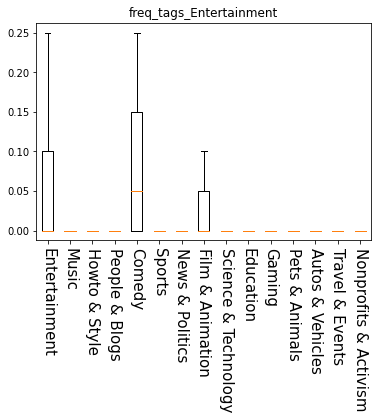

freq_tags_Music: f_score = 176.47720853900836 p_value = 0.0


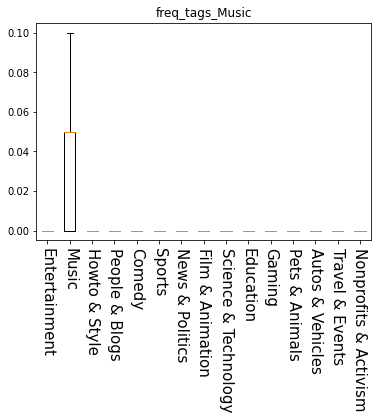

freq_tags_Howto & Style: f_score = 182.504537354182 p_value = 0.0


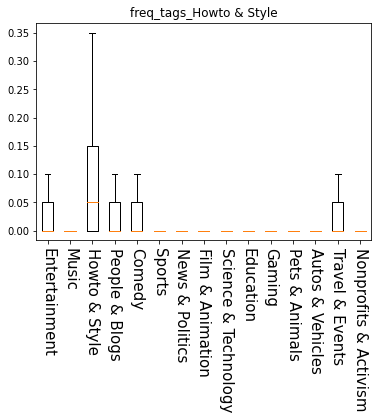

freq_tags_People & Blogs: f_score = 89.39743311094924 p_value = 4.187447779521239e-241


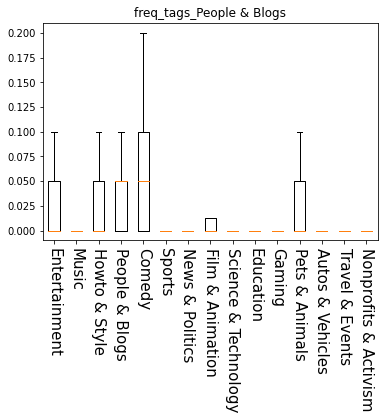

freq_tags_Comedy: f_score = 157.3292041067296 p_value = 0.0


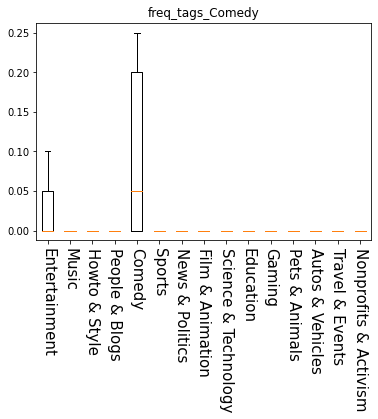

freq_tags_Sports: f_score = 407.6492074481763 p_value = 0.0


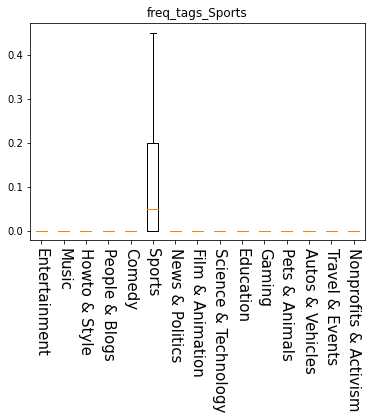

freq_tags_News & Politics: f_score = 164.6318538743838 p_value = 0.0


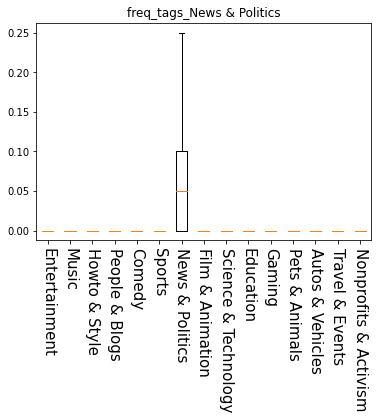

freq_tags_Film & Animation: f_score = 144.58795099895016 p_value = 0.0


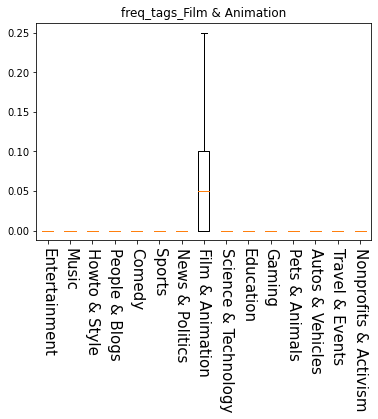

freq_tags_Science & Technology: f_score = 96.42655290726175 p_value = 1.5776957044796572e-259


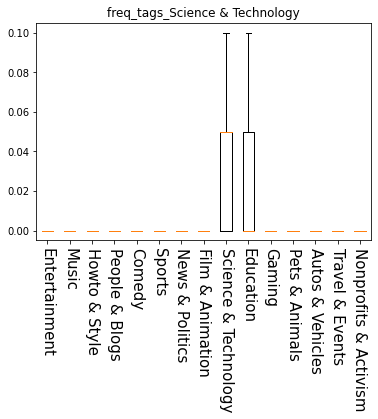

freq_tags_Education: f_score = 365.1190374108181 p_value = 0.0


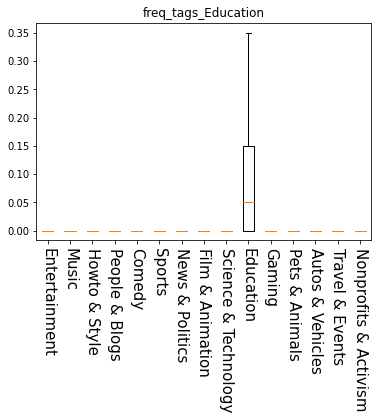

freq_tags_Gaming: f_score = 74.62975071087605 p_value = 7.575201720776306e-202


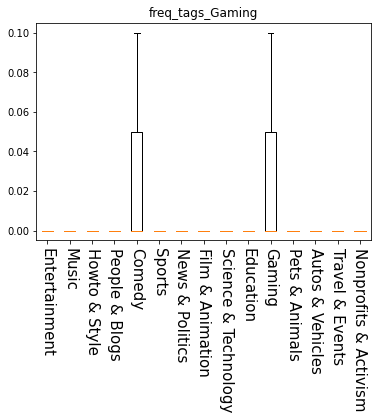

freq_tags_Pets & Animals: f_score = 274.77890624896526 p_value = 0.0


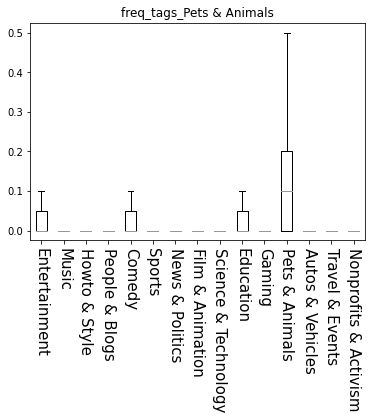

freq_tags_Autos & Vehicles: f_score = 31.85265646807874 p_value = 4.750487792857866e-84


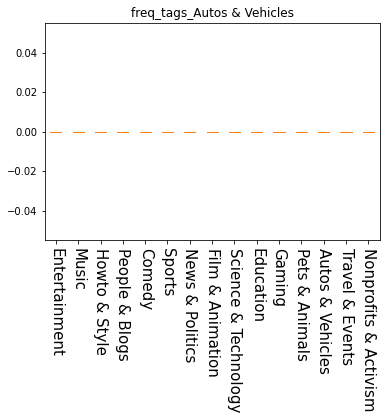

freq_tags_Travel & Events: f_score = 90.48644619268804 p_value = 5.70881483456312e-244


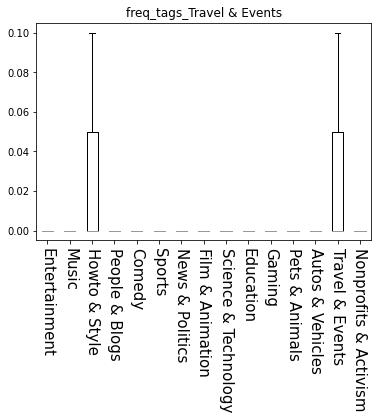

freq_tags_Nonprofits & Activism: f_score = 77.15278612757959 p_value = 1.3162232282914709e-208


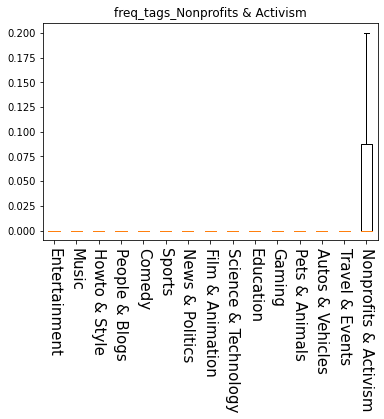

In [131]:
attr = "tags"
for cat in categories:
    attr_name = f"freq_{attr}_{categories_dict[cat]}"
    anova(categories_data, attr_name)


## Emocje

In [132]:
videos["tokenized_emotion"] = videos["emotions"].apply(lambda x: [eval(x)[-1]] if eval(x) else np.nan)
# plot_categories_bars(categories, "emotion", create_tokens_dict=False)

## Video_id

In [133]:
contingency = pd.crosstab(videos["video_id"], videos["category_name"], normalize="index")

_, p, _, _ = stats.chi2_contingency(contingency)

print(f"p value: {p}")

p value: 0.49986593554965586


P wartość nie pozwala na odrzucenie hipotezy zerowej, zatem nie występuje zależność
kontyngencja między atrybutem kategorii a *video_id*. Jest to spodziewany wynik,
ponieważ atrybut ten pozwala jedynie unikalnie identyfikować filmy, nie wnosi on żadnej
wiedzy na temat zawartości filmu, co za tym idzie o przynależności do danej kategorii.

## New video id

Atrybut, który został wyznaczony z obrobionych linków *thumbnail_link* oraz *video_id*.

In [134]:
contingency = pd.crosstab(videos["new_video_id"], videos["category_name"], normalize="index")

_, p, _, _ = stats.chi2_contingency(contingency)

print(f"p value: {p}")

p value: 0.4874814565439463


Podobnie jak w przypadku oryginalnego identyfikatora z danych nie występuje zależność
pomiędzy nim a kategorią, do której należy reprezentowany przez niego film. Jest to także
spodziewany wynik oceny przydatności atrybutu.

## Thumbnail link

In [135]:
contingency = pd.crosstab(videos["thumbnail_link"], videos["category_name"], normalize="index")
_, p, _, _ = stats.chi2_contingency(contingency)
print(f"p value: {p}")

p value: 0.4874814565439463


Podobnie jak dwa atrybuty odpowiadające za identyfikację filmu także
dla atrybutu *thumbnail link* nie występuje istotna statystycznie zależność
pomiędzy nim oraz kategorią, do której należy film. Także jak dwa poprzednie atrybuty
nie będzie on używany podczas uczenia modeli.

## Comments disabled

In [136]:
contingency = pd.crosstab(videos["comments_disabled"], videos["category_name"], normalize="index")
_, p, _, _ = stats.chi2_contingency(contingency)
print(f"p value: {p}")

p value: 0.9999999976297544


Także ten atrybut nie pozwala dobrze wnioskować o przynależności do poszczególnych
kategorii filmów. Podobnie nie można odrzucić $$ H_0 $$ na rzecz $$ H_1 $$.
Jest to także przewidziany wynik, nie mniej ten atrybut może być przydatny,
kiedy przyjdzie rozróżniać pomiędzy filmami trening i nie trending.

## Ratings disabled

In [137]:
contingency = pd.crosstab(videos["ratings_disabled"], videos["category_name"], normalize="index")
_, p, _, _ = stats.chi2_contingency(contingency)
print(f"p value: {p}")

p value: 0.9999999946760177


Atrybut *ratings_disabled* to kolejny atrybut logiczny, który nie będzie
używany podczas uczenia pół nadzorowanego. Tutaj także nie występuje zależność
pomiędzy nim a kategorią, do której należy film. Podobanie jak poprzeni atrybut
także może okazać się przydatny w rozpoznawaniu filmów trending, taka analiza
zostanie przeprowadzona w etapie 5.

## Video error or removed

In [138]:
contingency = pd.crosstab(videos["video_error_or_removed"], videos["category_name"], normalize="index")
_, p, _, _ = stats.chi2_contingency(contingency)
print(f"p value: {p}")

p value: 0.9999998203750728


Kolejny atrybut, który od samego początku wydawał się nieistotny z punktu
widzenia rozróżniania kategorii filmu. Także nie możemy odrzucić
hipotezy $$ H_0 $$ mówiącej o niezależności tych atrybutów. Podobnie jak poprzednie
atrybuty logiczne ten atrybut może okazać się istotny w etapie 5.

## Trending date - trending_date

In [139]:
contingency = pd.crosstab(videos["trending_date"], videos["category_name"], normalize="index")
_, p, _, _ = stats.chi2_contingency(contingency)
print(f"p value: {p}")

p value: 1.0


## Publish time - publish_time

In [141]:
contingency = pd.crosstab(videos["publish_time"], videos["category_name"], normalize="index")
_, p, _, _ = stats.chi2_contingency(contingency)
print(f"p value: {p}")

p value: 0.7847430167361414


## Podsumowanie

### Atrybuty, które pozostają w zbiorze:
- Atrybuty liczbowe:
    - views,
    - likes,
    - comments_count,
    TODO w sumie nie wiem, ale statystycznie różne (te 5)
    - description_len,
    - title_len,
    - channel_title len
    - publish_time_day_of_week
    - publish_time_hour_of_day

- Atrybuty tekstowe w postaci listy tokenów:
    - channel_title,
    - title,
    - description,
    - tags
- Atrybuty tekstowe agregowane do ilości wystąpień słów charakterystycznych:
    - freq_channel_titles.. - dla każdej kategorii,
    - freq_titles... - dla każdej kategorii,
    - freq_tags... - dla każdej kategorii

### Odrzucone atrybuty:
- Atrybuty tekstowe:
    - video_id,
    - new_video_id (pozostanie tylko na potrzeby identyfikacji filmów),
    - trending_date,
    - publish_time,
- Atrybuty wizualne:
    - uzyskane przy pomocy narzędzia OCR,
    - uzyskane przy pomocy narzędzia ekstrakcji emocji,
- Atrybuty tekstowe agregowane do ilości wystąpień słów charakterystycznych:
    - freq_ocr_text... - dla każdej kategorii,
    - freq_filtered_ocr_text... - dla każdej kategorii,
    - freq_domains... - dla każdej kategorii,
    - freq_emotions... - dla każdej z kategorii,

- Atrybuty logiczne:
    - comments_disabled,
    - ratings_disabled,
    - video_error_or_removed



Zapisanie ostatecznego zbioru danych.

In [140]:
# TODO